# Array Displays

Like `CameraDisplays`, ctapipe provides a way to display information related to the array on the ground: `ArrayDisplay`

In [1]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import sys
#from divtel.telescope import Telescope, Array
from astropy.coordinates import SkyCoord
#from divtel import pointing
from divtel import *
import healpy as hp
import tqdm

In [2]:
tel_ids = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,38,39,40,41,42,
 43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,
 63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79]# alpha + 4LSTS

In [3]:
array = LoadConfig("/home/irene/ctasoft/divtel/config/Paranal_prod6_alpha4LSTs_reduced_list.txt")
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,rad,rad,rad,m,m,rad2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-20.64,-64.82,34.0,0.000,0.000,1.571,28.000,1.051,0.004,1.000,-0.000,0.000,66.40
2,79.99,-0.77,29.0,0.000,0.000,1.571,28.000,1.051,0.004,1.000,-0.000,0.000,87.14
3,-19.4,65.2,31.0,0.000,0.000,1.571,28.000,1.051,0.004,1.000,-0.000,0.000,66.28
4,-120.03,1.15,33.0,0.000,0.000,1.571,28.000,1.051,0.004,1.000,-0.000,0.000,112.94
5,-0.02,-0.0,24.0,0.000,0.000,1.571,16.000,1.077,0.014,1.000,-0.000,0.000,9.35
6,1.43,151.02,25.0,0.000,0.000,1.571,16.000,1.077,0.014,1.000,-0.000,0.000,151.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,744.56,-374.23,4.25,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,840.13


In [4]:
#data = pd.read_csv (f"/home/irene/ctasoft/divtel/config/CTA-PROD6_TelescopePositionsParanal.txt", 
#                    names=['x','y','z','focal','rfov'],
#                    sep=' ',
#                    #skiprows=1, # 9 for triggered, 11 for non triggered
#                    #skipfooter=2, # esclude le ultime n righe, n=2 in questo caso
#                    engine='python')

In [5]:
#data

In [6]:
group1=[]
group2=[]
group3=[]
group4=[]
distances = np.hypot(
    array.table["x"] - array.barycenter[0],
    array.table["y"] - array.barycenter[1],
)
for i in range(len(distances)):
    if distances[i] < 250:
        group1.append(array.table["id"][i])
    elif distances[i] > 250 and distances[i]<500:
        group2.append(array.table["id"][i])
    elif distances[i] > 500 and distances[i]<800:
        group3.append(array.table["id"][i])
    else:
        group4.append(array.table["id"][i])

In [7]:
print(group1)
print(group2)
print(group3)
print(group4)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 14, 19, 20]
[10, 11, 12, 15, 16, 17, 18, 21, 22, 27, 28, 31, 32]
[23, 24, 29, 30, 33, 34, 37, 38, 39, 40, 43, 44, 45, 46, 49, 54]
[25, 26, 35, 36, 41, 42, 47, 48, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60]


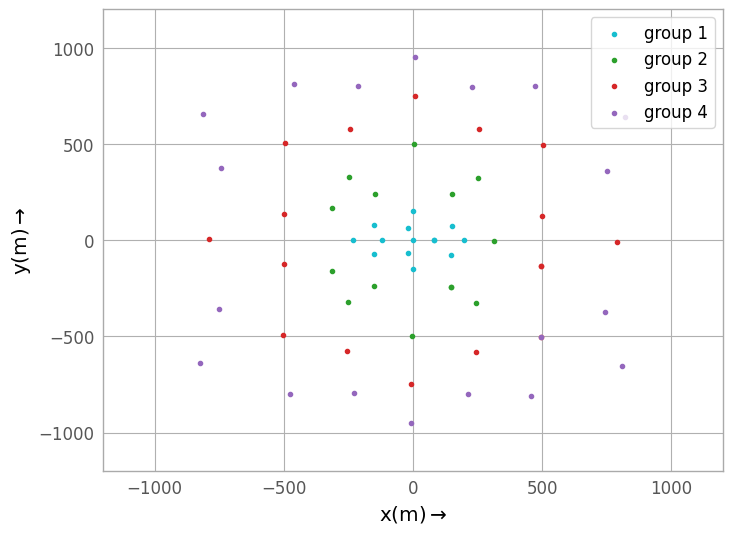

In [9]:
for i in group1:
    plt.scatter(array.table["x"][i-1],array.table["y"][i-1],color='tab:cyan',marker='.')
for i in group2:
    plt.scatter(array.table["x"][i-1],array.table["y"][i-1],color='tab:green',marker='.')
for i in group3:
    plt.scatter(array.table["x"][i-1],array.table["y"][i-1],color='tab:red',marker='.')
for i in group4:
    plt.scatter(array.table["x"][i-1],array.table["y"][i-1],color='tab:purple',marker='.')
plt.xlim(-1200,1200)
plt.ylim(-1200,1200)
plt.scatter(array.table["x"][1],  array.table["y"][1],  color='tab:cyan',   marker='.', label='group 1')
plt.scatter(array.table["x"][10], array.table["y"][10], color='tab:green',  marker='.', label='group 2')
plt.scatter(array.table["x"][42], array.table["y"][42], color='tab:red',    marker='.', label='group 3')
plt.scatter(array.table["x"][44], array.table["y"][44], color='tab:purple', marker='.', label='group 4')
plt.xlabel(r'x(m)$\rightarrow$')
plt.ylabel(r'y(m)$\rightarrow$')
plt.legend()

In [10]:
from divtel.layout import LoadTable
from divtel.array import *

In [11]:
subarray1=array.table[:0].copy()
subarray2=array.table[:0].copy()
subarray3=array.table[:0].copy()
subarray4=array.table[:0].copy()
sub_groups={'1': group1, 
            '2': group2,
            '3': group3, 
            '4': group4,
            }
for i in range(len(array.table['id'])):
    for tel_id in group1:
        if array.table['id'][i] == tel_id:
            subarray1.add_row(array.table[i])
    for tel_id in group2:
        if array.table['id'][i] == tel_id:
            subarray2.add_row(array.table[i])
    for tel_id in group3:
        if array.table['id'][i] == tel_id:
            subarray3.add_row(array.table[i])
    for tel_id in group4:
        if array.table['id'][i] == tel_id:
            subarray4.add_row(array.table[i])
                   
                          
            
G1=LoadTable(subarray1)
G2=LoadTable(subarray2)
G3=LoadTable(subarray3)
G4=LoadTable(subarray4)
G4.divergent_pointing(div = -0.002, az = 180, alt = 70)
G3.divergent_pointing(div = -0.001, az = 180, alt = 70)
G2.divergent_pointing(div = 0.001, az = 180, alt = 70)
G1.divergent_pointing(div = 0.003, az = 180, alt = 70)

G3.table.units='deg'
G3.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
23,-254.59,-574.69,54.25,180.970,70.129,19.871,5.600,4.450,62.462,-0.340,0.006,0.940,629.14
24,-243.51,579.47,8.25,179.022,70.132,19.868,5.600,4.450,62.462,-0.340,-0.006,0.940,628.79
29,-7.21,-749.1,62.25,181.255,69.992,20.008,5.600,4.450,62.462,-0.342,0.007,0.940,749.99
30,7.17,749.1,12.75,178.746,69.994,20.006,5.600,4.450,62.462,-0.342,-0.007,0.940,749.26
33,243.48,-579.47,41.25,180.964,69.863,20.137,5.600,4.450,62.462,-0.344,0.006,0.939,628.75
34,254.55,574.69,17.75,179.044,69.862,20.138,5.600,4.450,62.462,-0.344,-0.006,0.939,628.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,497.8,-134.81,12.25,180.223,69.735,20.265,5.600,4.450,62.462,-0.346,0.001,0.938,516.00


In [21]:
G2.table.units='deg'
G2.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10,152.31,238.59,24.0,180.401,70.094,19.906,16.000,3.850,46.707,-0.340,0.002,0.940,296.56
11,147.7,-241.47,30.0,179.593,70.093,19.907,16.000,3.850,46.707,-0.340,-0.002,0.940,296.55
12,313.02,-3.0,19.0,179.995,70.180,19.820,16.000,3.850,46.707,-0.339,-0.000,0.941,337.24
15,-152.34,-238.59,38.5,179.601,69.933,20.067,16.000,3.850,46.707,-0.343,-0.002,0.939,271.30
16,-147.73,241.47,27.0,180.403,69.933,20.067,16.000,3.850,46.707,-0.343,0.002,0.939,271.07
17,-314.61,-159.02,35.0,179.735,69.845,20.155,16.000,3.850,46.707,-0.345,-0.002,0.939,331.38
18,-311.5,165.03,30.5,180.274,69.846,20.154,16.000,3.850,46.707,-0.345,0.002,0.939,331.31
21,-252.17,-322.65,40.75,179.463,69.879,20.121,5.600,4.450,62.462,-0.344,-0.003,0.939,395.53


In [36]:
G1.pointing

{'az': <Quantity 180. deg>,
 'alt': <Quantity 70. deg>,
 'ra': <Quantity 0. deg>,
 'dec': <Quantity 0. deg>}

In [22]:
G4.table.units='deg'
G4.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
25,-227.7,-795.0,68.25,182.698,70.213,19.787,5.600,4.450,62.462,-0.338,0.016,0.941,827.50
26,-212.4,799.22,10.25,177.291,70.219,19.781,5.600,4.450,62.462,-0.338,-0.016,0.941,827.38
35,212.36,-799.22,56.25,182.643,69.744,20.256,5.600,4.450,62.462,-0.346,0.016,0.938,827.20
36,227.66,795.0,25.25,177.373,69.740,20.260,5.600,4.450,62.462,-0.346,-0.016,0.938,827.08
41,-473.8,-799.64,76.25,182.753,70.476,19.524,5.600,4.450,62.462,-0.334,0.016,0.943,930.21
42,-458.36,808.58,17.25,177.218,70.481,19.519,5.600,4.450,62.462,-0.334,-0.016,0.943,929.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,744.56,-374.23,4.25,181.201,69.211,20.789,5.600,4.450,62.462,-0.355,0.007,0.935,834.10


In [23]:
G1.table.units='deg'
G1.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-20.64,-64.82,34.0,179.674,69.984,20.016,28.000,2.150,14.536,-0.342,-0.002,0.940,66.40
2,79.99,-0.77,29.0,179.996,70.144,19.856,28.000,2.150,14.536,-0.340,-0.000,0.941,88.58
3,-19.4,65.2,31.0,180.327,69.985,20.015,28.000,2.150,14.536,-0.342,0.002,0.940,66.15
4,-120.03,1.15,33.0,180.005,69.824,20.176,28.000,2.150,14.536,-0.345,0.000,0.939,111.65
5,-0.02,-0.0,24.0,180.000,70.012,19.988,16.000,3.850,46.707,-0.342,-0.000,0.940,9.00
6,1.43,151.02,25.0,180.759,70.013,19.987,16.000,3.850,46.707,-0.342,0.005,0.940,151.28
7,-1.47,-151.02,31.0,179.240,70.012,19.988,16.000,3.850,46.707,-0.342,-0.005,0.940,151.32
8,150.72,73.57,21.0,180.375,70.254,19.746,16.000,3.850,46.707,-0.338,0.002,0.941,175.51


In [24]:
#G4.divergent_pointing(div = -0.001, az = 180, alt = 70)

<Quantity 113.28889312 deg2>

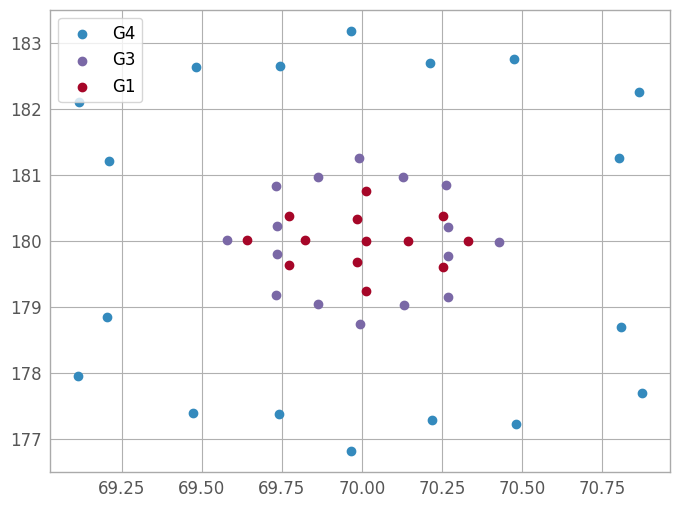

In [25]:
plt.scatter(G4.table['alt'],G4.table['az'],label='G4')
'''for i in range (len(G4.table)):
    plt.annotate(G4.table['id'][i],(G4.table['alt'][i],G4.table['az'][i]));'''
plt.scatter(G3.table['alt'],G3.table['az'],label='G3')
plt.scatter(G1.table['alt'],G1.table['az'],label='G1')
plt.legend();
G4.hFoV(m_cut=4)

In [26]:
tab=G2.table.copy()
for i in range(len(G1.table)):
    tab.add_row(G1.table[i])
for i in range(len(G3.table)):
    tab.add_row(G3.table[i])
for i in range(len(G4.table)):
    tab.add_row(G4.table[i])

In [27]:
G2.get_pointing_coord(icrs=False)

<SkyCoord (AltAz: obstime=2024-01-04T08:24:23.506, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(180.40136586, 70.09390188), (179.59306014, 70.09257546),
     (179.99453258, 70.18006048), (179.60142297, 69.93269799),
     (180.40266465, 69.93290888), (179.73546791, 69.84502332),
     (180.27377061, 69.8457929 ), (179.46270203, 69.87909559),
     (180.5445799 , 69.87779962), (179.16314898, 70.01082039),
     (180.83630934, 70.01049755), (179.44674528, 70.14459918),
     (180.54450248, 70.14594687)]>

In [28]:
tab

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10,152.31,238.59,24.0,180.401,70.094,19.906,16.000,3.850,46.707,-0.340,0.002,0.940,296.56
11,147.7,-241.47,30.0,179.593,70.093,19.907,16.000,3.850,46.707,-0.340,-0.002,0.940,296.55
12,313.02,-3.0,19.0,179.995,70.180,19.820,16.000,3.850,46.707,-0.339,-0.000,0.941,337.24
15,-152.34,-238.59,38.5,179.601,69.933,20.067,16.000,3.850,46.707,-0.343,-0.002,0.939,271.30
16,-147.73,241.47,27.0,180.403,69.933,20.067,16.000,3.850,46.707,-0.343,0.002,0.939,271.07
17,-314.61,-159.02,35.0,179.735,69.845,20.155,16.000,3.850,46.707,-0.345,-0.002,0.939,331.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,744.56,-374.23,4.25,181.201,69.211,20.789,5.600,4.450,62.462,-0.355,0.007,0.935,834.10


In [29]:
np.min(tab['alt'])

69.11485924440798

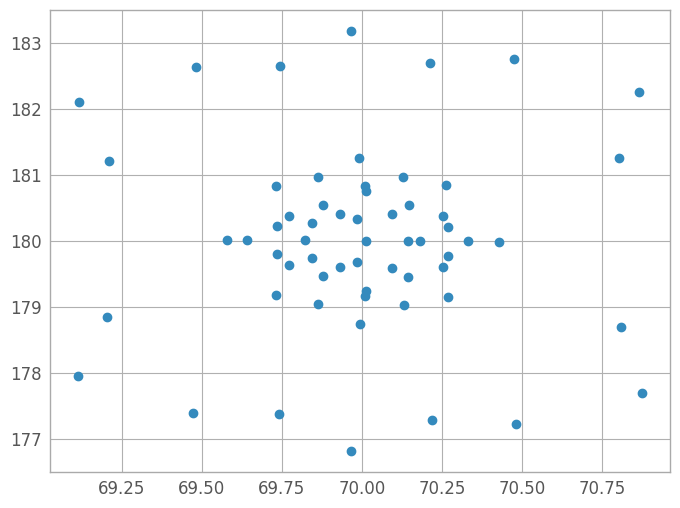

In [30]:
plt.scatter(tab['alt'],tab['az'])

In [31]:
unit=u.rad
a=np.pi*unit
a.to(u.deg)

<Quantity 180. deg>

In [32]:
len(tab['alt'].to(u.deg))

60

In [33]:
len(G2.table)

13

In [42]:
G4.pointing

{'az': <Quantity 180. deg>,
 'alt': <Quantity 70. deg>,
 'ra': <Quantity 0. deg>,
 'dec': <Quantity 0. deg>}

In [48]:
tab

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10,152.31,238.59,24.0,180.401,70.094,19.906,16.000,3.850,46.707,-0.340,0.002,0.940,296.56
11,147.7,-241.47,30.0,179.593,70.093,19.907,16.000,3.850,46.707,-0.340,-0.002,0.940,296.55
12,313.02,-3.0,19.0,179.995,70.180,19.820,16.000,3.850,46.707,-0.339,-0.000,0.941,337.24
15,-152.34,-238.59,38.5,179.601,69.933,20.067,16.000,3.850,46.707,-0.343,-0.002,0.939,271.30
16,-147.73,241.47,27.0,180.403,69.933,20.067,16.000,3.850,46.707,-0.343,0.002,0.939,271.07
17,-314.61,-159.02,35.0,179.735,69.845,20.155,16.000,3.850,46.707,-0.345,-0.002,0.939,331.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,744.56,-374.23,4.25,181.201,69.211,20.789,5.600,4.450,62.462,-0.355,0.007,0.935,834.10


In [50]:
nside = 512
map_multiplicity = np.zeros(hp.nside2npix(nside), dtype=np.int8)
counter = np.arange(0, hp.nside2npix(nside))
ra, dec = hp.pix2ang(nside, counter, True, lonlat=True)
coordinate = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
#array.table.units="deg"
for i in tqdm.tqdm(range(len(array.telescopes))):
    pointing = SkyCoord(ra=tab['az'][i], dec=tab['alt'][i], unit='deg')
    r_fov = tab["radius"][i]*u.deg
    mask = coordinate.separation(pointing) < r_fov
    map_multiplicity[mask] += 1
    
print(hp.nside2npix(nside), hp.nside2pixarea(nside, True), hp.nside2resol(nside, True))
mask_fov = map_multiplicity>0
mask_fov_eff = map_multiplicity>3

print(hp.nside2pixarea(nside, True)*np.sum(mask_fov),
      hp.nside2pixarea(nside, True)*np.sum(mask_fov_eff),
      np.sum(mask_fov_eff)/np.sum(mask_fov))
print(np.mean(map_multiplicity[mask_fov]),
      np.mean(map_multiplicity[mask_fov_eff]))

100%|███████████████████████████████████████████| 60/60 [00:12<00:00,  4.72it/s]


3145728 0.013113963206424481 6.870972823634812
95.32539854749955 85.46369821626834 0.8965469803274178
34.82941257394415 38.634647844100044


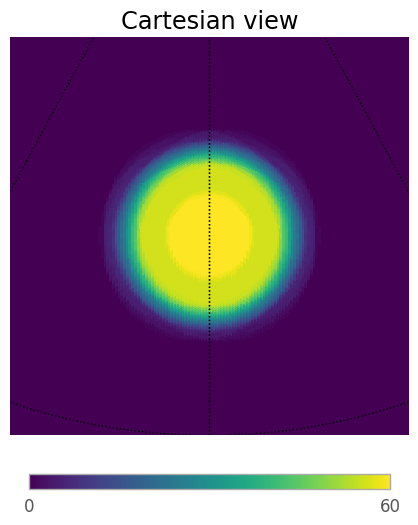

In [53]:
hp.cartview(map_multiplicity, rot=[G4.pointing["az"].value, G4.pointing["alt"].value], lonra=[-10,10], latra=[-10,10], nest=True, cmap='viridis')
hp.graticule()

In [48]:
polygons = {}
for i in range(len(tab['az'])):
    if max(tab["az"])-min(tab['az']) > 180:
            
        
        if tab['az'][i] < 180:
            polygons[i]=(Point(tab['az'][i],tab["alt"][i]).buffer(tab['radius'][i]))
        else:
            polygons[i]=(Point(tab['az'][i]-360,tab["alt"][i]).buffer(tab['radius'][i]))
    
    else:

        polygons[i] = Point(tab['az'][i],tab["alt"][i]).buffer(tab['radius'][i])

In [49]:
rings = [LineString(list(pol.exterior.coords)) for pol in polygons.values()]
union = unary_union(rings)
result = {counter:geom for counter, geom in enumerate(polygonize(union))}

ori = list(polygons.values())
res = list(result.values())

dict_count_overlaps = {}
for i in range(len(res)):
    dict_count_overlaps[i] = 0
    for j in range(len(ori)):
         if np.isclose(res[i].difference(ori[j]).area, 0):
            dict_count_overlaps[i] +=1
             #print(f"res_{colors[i]}, orig_{j+1}")


max_multiplicity = max(dict_count_overlaps.values())


In [50]:
overlaps = np.array(list(dict_count_overlaps.values()))
#print(len(res), len(overlaps_nocut))
eff_hfov = []
eff_overlaps=[]
eff_res=[]
for i,patchsky in enumerate(res):
    
    if overlaps[i]>=cut:
        eff_overlaps.append(overlaps[i])
        eff_hfov.append(patchsky.area)
        eff_res.append(res[i])

Text(0.9, 0.9, 'Average multiplicity: 27.7 ')

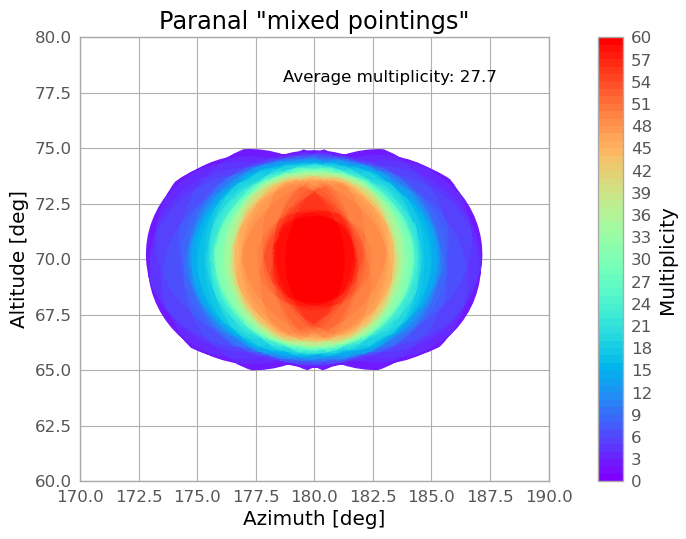

In [54]:
eff_res=np.array(eff_res)
eff_hfov= np.array(eff_hfov) 
eff_overlaps= np.array(eff_overlaps) 
average_overlap = np.average(eff_overlaps, weights=eff_hfov)



cmap = plt.cm.get_cmap('rainbow')
color_list = cmap(np.linspace(0, 1, max_multiplicity))
minmax = []

bounds = np.arange(max_multiplicity + 1) + 1
fig = plt.figure(figsize=(7,6))
gs  = mpl.gridspec.GridSpec(1, 2, width_ratios=[0.95, 0.05])

ax = plt.subplot(gs[0])
ax_cb = plt.subplot(gs[1])
ax.set_title(r'Paranal "mixed pointings"')
fig.subplots_adjust(top=0.85)

    
for pol_id, pol in enumerate (eff_res):
    colore = eff_overlaps[pol_id]
    ax.add_patch(
         PolygonPatch(mapping(pol), color=color_list[colore-1])
    )


norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cb1 = mpl.colorbar.ColorbarBase(ax_cb,
                                 norm=norm,
                                 cmap=cmap,
                                 boundaries = bounds,
                                 orientation='vertical',
                                 label='Multiplicity')
cb1.set_ticks(np.arange(0, max_multiplicity+1, step=3) + 1)
cb1.set_ticklabels(np.arange(0, max_multiplicity+1, step=3))
Drawing_colored_circle = plt.Circle((0,70),10, fill= False ,color = 'k',label=f'r=10deg')
#Drawing_colored_circle_1 = plt.Circle((pointing.az.deg, pointing.alt.deg),10, fill= False ,color = 'k',label=f'r=10deg',linestyle='--')
 
#ax.set_aspect( 1 )
#ax.add_artist( Drawing_colored_circle)
#ax.add_artist( Drawing_colored_circle_1)

ax.set_xlabel("Azimuth [deg]")
ax.set_ylabel("Altitude [deg]")
ax.set_xlim(170,190)
ax.set_ylim(60,80)
#ax.set_xlim(np.min(tab['az'])-5, np.max(tab['az'])+5)
#ax.set_ylim(np.min(tab['alt'])-5, np.max(tab['alt'])+5)
#ax.legend(loc='lower right')
ax.text(0.9, 0.9, r"Average multiplicity: {:.1f} ".format(average_overlap), 
        ha="right", transform=ax.transAxes)




133.4074756604622 deg2


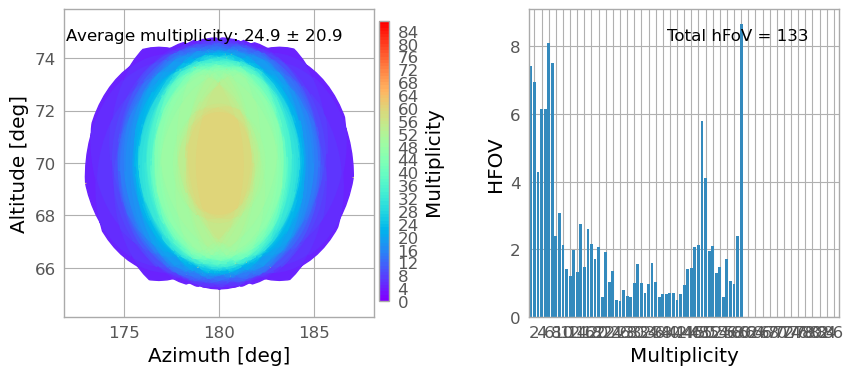

In [52]:
m_cut=0
fig=None
m, overlaps, geoms = hfov
max_m = int(array.size_of_array)
ave_multi = np.average(m[:,0], weights=m[:,1])
var_multi = np.average((m[:,0]-ave_multi)**2, weights=m[:,1])

if fig is None:
    fig = plt.figure(figsize=(10, 4)) 

cmap = plt.cm.get_cmap('rainbow')
color_list = cmap(np.linspace(0, 1, max_m))
bounds = np.arange(max_m + 1) + 1

gs  = mpl.gridspec.GridSpec(1, 2)

ax = plt.subplot(gs[0])
ax_cb = fig.add_axes([0.44,0.15,0.01,0.7])
ax_mul = plt.subplot(gs[1])

plt.subplots_adjust(wspace=0.5)

cmap = plt.cm.get_cmap('rainbow')
color_list = cmap(np.linspace(0, 1, max_m))

minmax = []
for i, pol in enumerate(geoms):
    colore = int(overlaps[i])
    pol_map = mapping(pol)
    ax.add_patch(PolygonPatch(pol_map, color=color_list[colore-1]))
    patch_az = np.asarray(pol_map['coordinates'])[0][:][0]
    minmax.append([min(patch_az), max(patch_az)])
minmax = np.asarray(minmax)

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cb1 = mpl.colorbar.ColorbarBase(ax_cb,
                                 norm=norm,
                                 cmap=cmap,
                                 boundaries = bounds,
                                 orientation='vertical',
                                 label='Multiplicity')
cb1.set_ticks(np.arange(0, max_m+1, step=4) + 1)
cb1.set_ticklabels(np.arange(0, max_m+1, step=4))

ax.set_xlabel("Azimuth [deg]")
ax.set_ylabel("Altitude [deg]")
#print(np.min(minmax[:,1])-5)
ax.set_xlim(np.min(tab['az'])-5, np.max(tab['az'])+5)
ax.set_ylim(np.min(tab["alt"])-5, np.max(tab["alt"])+5)

ax.text(0.9, 0.9, r"Average multiplicity: {:.1f} $\pm$ {:.1f}".format(ave_multi, np.sqrt(var_multi)), 
        ha="right", transform=ax.transAxes)

ax_mul.bar(m[:,0], m[:,1])
ax_mul.text(0.9, 0.9, "Total hFoV = {:.0f}".format(sum(m[:,1][m[:,0]>=m_cut])), ha="right", transform=ax_mul.transAxes)
ax_mul.set_xticks(np.arange(0, max_m+1, step=2))
ax_mul.set_xlim(0.5, max_m+0.5)
ax_mul.set_ylabel('HFOV')
ax_mul.set_xlabel('Multiplicity')
print(hfov_from_table(tab))

In [ ]:
array.divergent_pointing(-0.015,alt=90,az=180)
#print(array.hFoV(m_cut=4))
#multiplicity_plot(array,m_cut=4)
array.display('xyz')

In [ ]:
multiplicity_plot(array,m_cut=0)

In [ ]:
G4.display('yz')

In [ ]:
G4.display('xz')

In [ ]:
G4.display('xy')

In [ ]:
G4.hFoV(m_cut=6) ### wrong?

## Overlaying vectors

For plotting reconstruction quantities, it's useful to overlay vectors on the telescope positions. `ArrayDisplay` provides functions:
* `set_vector_uv` to set by cartesian coordinates from the center of each telescope
* `set_vector_rho_phi` to set by polar coorinates from the center of each telescope
* `set_vector_hillas` to set vectors from a `dict[int,HillasParameters]` mapping tel_id (not index!) to a set of parameters. 

In [ ]:
np.random.seed(0)
phis = np.random.uniform(0, 180.0, size=subarray.n_tels) * u.deg
rhos = np.ones(subarray.n_tels) * 200 * u.m


ad = ArrayDisplay(subarray, frame=EastingNorthingFrame(), tel_scale=2)
ad.set_vector_rho_phi(rho=rhos, phi=phis)

## Overlaying Image Axes

For the common use case of plotting image axis on an `ArrayDisplay`, the `set_line_hillas()` method is provided for convenience. The following example shows its use: 

In [ ]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from ctapipe.calib import CameraCalibrator
from ctapipe.image import ImageProcessor
from ctapipe.io import EventSource
from ctapipe.reco import ShowerProcessor
from ctapipe.utils import get_dataset_path
from ctapipe.visualization import ArrayDisplay
from IPython import display
from matplotlib.animation import FuncAnimation

input_url =  "/home/irene/grid/shared_folder/analyses/test_ctapipe/data/simtel/gamma/gamma_20deg_180deg_run000018___cta-prod6-paranal-2147m-Paranal-divergent-div0.0043-dark.simtel.zst"
    #"dataset://gamma_20deg_0deg_run1___cta-prod5-lapalma_desert-2158m-LaPalma-dark_100evts.simtel.zst"
#"dataset://gamma_LaPalma_baseline_20Zd_180Az_prod3b_test.simtel.gz"

First, we define a function to plot the array with overlaid lines for the image axes

In [ ]:
def plot_event(event, subarray, ax):
    """
    Draw an ArrayDisplay with image axes and the
    true and reconstructed impact position overlaid
    """

    array_pointing = SkyCoord(
        az=event.pointing.array_azimuth,
        alt=event.pointing.array_altitude,
        frame="altaz",
    )

    angle_offset = event.pointing.array_azimuth
    disp = ArrayDisplay(subarray, axes=ax)

    hillas_dict = {tid: tel.parameters.hillas for tid, tel in event.dl1.tel.items()}
    core_dict = {tid: tel.parameters.core.psi for tid, tel in event.dl1.tel.items()}

    disp.set_line_hillas(
        hillas_dict,
        core_dict,
        500,
    )

    reco_shower = event.dl2.stereo.geometry["HillasReconstructor"]

    ax.scatter(
        event.simulation.shower.core_x,
        event.simulation.shower.core_y,
        s=200,
        c="k",
        marker="x",
        label="True Impact",
    )
    ax.scatter(
        reco_shower.core_x,
        reco_shower.core_y,
        s=200,
        c="r",
        marker="x",
        label="Estimated Impact",
    )

    ax.legend()

Now, we can loop through some events and plot them. Here we apply default calibration, image processing, and reconstruction, however it is better to use `ctapipe-process` with a well-defined configuration to do this in reality.  Note that some events will not have images bright enough to do parameterization or reconstruction, so they will have no image axis lines or no estimated impact position.

In [ ]:
fig, ax = plt.subplots(5, 3, figsize=(20, 40), constrained_layout=True)
ax = ax.ravel()

with EventSource(input_url, max_events=15, focal_length_choice="EQUIVALENT") as source:
    calib = CameraCalibrator(subarray=source.subarray)
    process_images = ImageProcessor(subarray=source.subarray)
    process_shower = ShowerProcessor(subarray=source.subarray)

    for i, event in enumerate(source):
        print(event.r1.tel.keys())
        calib(event)
        process_images(event)download
        process_shower(event)
        plot_event(event, source.subarray, ax=ax[i])